In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# Simulate data

x = np.arange(1,101)
error = np.random.randn(100) * 10
y = 6*x + error + 245

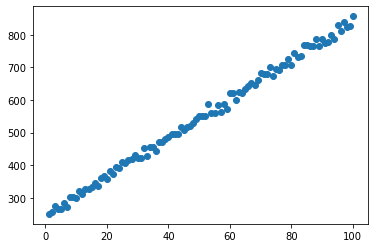

In [3]:
plt.scatter(x,y)

In [4]:
# Run Linear Regression from Sklearn for comparing results

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(pd.DataFrame(x), pd.DataFrame(y))
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)
print('Loss:', mean_squared_error(y, model.predict(x.reshape(-1,1))))

Coefficient: [[5.96754813]]
Intercept: [246.40711965]
Loss: 104.94013763186923


In [5]:
class LinearRegression():
    def __init__(self, loss_func = 'mse', optimizer = 'gd', alpha = 0.0001, epoch = None):
        self.loss_func = loss_func
        self.optimizer = optimizer
        self.iter_ = 0
        self.alpha = alpha
        self.epochs = epoch
        
    def fit(self, X, Y):
        
        if isinstance(X, pd.DataFrame):
            x = X.copy().values.reshape(X.shape[0],X.shape[1])
            x = np.append(x, np.ones(X.shape[0]).reshape(-1,1),axis = 1)     #extra for bias
        else:
            x = X.copy().reshape(X.shape[0],X.shape[1])
            x = np.append(x, np.ones(X.shape[0]).reshape(-1,1), axis = 1)     #extra for bias
        if isinstance(Y, pd.DataFrame):
            y = Y.copy().values.reshape(X.shape[0],1)
        else:
            y = Y.copy().reshape(X.shape[0],1)
            
        self.N = x.shape[0]
        self.d = x.shape[1]
        self.weights = np.array([0] * self.d).reshape(-1,1)                   
        self.track_loss = []
        delta_error = np.inf
        
        if self.optimizer == 'gd':  
            while delta_error > 0.0001:
                self.y_pred = np.dot(x, self.weights)                
                self.loss = 1/self.N * sum(np.square(y - self.y_pred))[0]
                self.track_loss.append(self.loss)
                step = self.gd(x, y, i=None)
                self.weights = self.weights - step
                if len(self.track_loss) >= 2:
                    delta_error = abs(self.track_loss[-2] - self.track_loss[-1])
                self.iter_ += 1
                    
        if self.optimizer == 'sgd':
            indices = np.arange(self.N)
            for epoch in range(self.epochs):
                np.random.shuffle(indices)
                for i in indices:
                    self.y_pred = np.dot(x, self.weights)
                    self.loss = 1/self.N * sum(np.square(y - self.y_pred))[0]
                    self.track_loss.append(self.loss)
                    step = self.gd(x, y, i)
                    self.weights = self.weights - step
                    if len(self.track_loss) >= 2:
                        delta_error = abs(self.track_loss[-2] - self.track_loss[-1])
                    self.iter_ += 1 
                        
        self.intercept_ = self.weights[-1][0]
        self.coef_ = self.weights[:-1][0]
            
    def gd(self, x, y, i):
        if self.optimizer == 'gd':
            return -(2/self.N * (y - self.y_pred) * x * self.alpha).sum(0).reshape(-1,1)   
        if self.optimizer == 'sgd':
            return -(2 * (y[i] - self.y_pred[i]).reshape(-1,1) * x[i].reshape(1,-1) * self.alpha).sum(0).reshape(-1,1)
        
    def predict(self, X):
        y_pred = X * self.coef_ + self.intercept_   
        return y_pred
        

In [6]:
model = LinearRegression(optimizer='gd', alpha=0.00025)
model.fit(pd.DataFrame(x),pd.DataFrame(y))

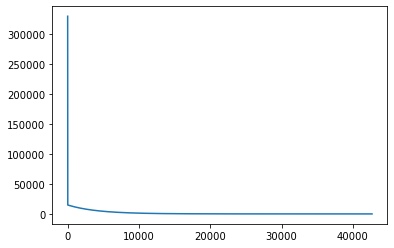

In [7]:
plt.plot(model.track_loss)

In [8]:
print('Coefficients:', model.weights[:-1])
print('Intercept:', model.weights[-1])
print('Loss:', model.loss)

Coefficients: [[5.98671226]]
Intercept: [245.12321629]
Loss: 105.34618878832437


In [9]:
model = LinearRegression(optimizer='sgd', epoch=2000, alpha=0.00006)
model.fit(pd.DataFrame(x),pd.DataFrame(y))

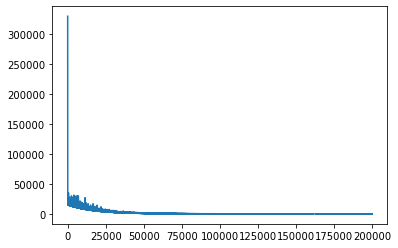

In [10]:
plt.plot(model.track_loss)

In [11]:
print('Coefficients:', model.weights[:-1])
print('Intercept:', model.weights[-1])
print('Loss:', model.loss)

Coefficients: [[6.11312169]]
Intercept: [245.75095331]
Loss: 151.4962105415358
